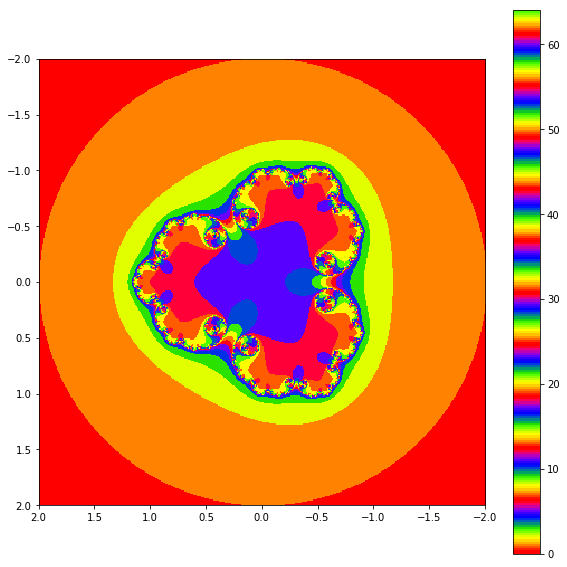

In [27]:
def NomeCognome():
    return "Samuele Traviganti 436681"

## PARTE PRIMA: ESERCIZI CON FOLD
##-------------------------------

def Fold(F, v, Ls):
    if Ls == []:
        return v
    else:
        return F(Ls[0], Fold(F, v, Ls[1:]))

def And(Ls):
    def FAnd(a,b):
        return a and b
    return Fold(FAnd, True, Ls)         # oppure Fold(lambda a,b: a and b, True, Ls) e analoghe le def sotto

def Or(Ls):
    def FOr(a,b):
        return a or b
    return Fold(FOr, False, Ls)

def Length(Ls):
    def FLength(a,b):
        return b+1
    return Fold(FLength, 0, Ls)

def Reverse(Ls):
    def FReverse(a,LLs):
        return LLs+[a]
    return Fold(FReverse, [], Ls)

def FoldFactorial(n):
    Ns=list(range(1,n+1))
    return Fold(lambda a,b: a*b, 1, Ns)

def SumLength(Ls):
    return (Fold(lambda a,b: a+b, 0, Ls), Length(Ls))

def Map(F,Ls):
    def FMap(a,LLs):
        return [F(a)]+LLs
    return Fold(FMap, [], Ls)

def Filter(P, Ls):
    def FFilter(a, LLs):
        if P(a) == True:
            return [a]+LLs
        else:
            return LLs
    return Fold(FFilter, [], Ls)

def FoldLeft(F, v, Ls):
    if Ls == []:
        return v
    else:
        return F(FoldLeft(F, v, Ls[:-1]), Ls[-1])

## PARTE SECONDA: LISTA INFINITA NUMERI PRIMI
##-------------------------------------------

def NumeriPrimi():
    return "Ho fatto vari tentativi ma non riesco a farlo girare"

def Fibonacci():
    x1=0
    x2=1
    while True:
        k=x2+x1
        x1=x2
        x2=k
        yield x2

listafibo = Fibonacci()

## PARTE TERZA: JULIA SET E FRATTALI
##----------------------------------

import matplotlib.pyplot as plt
import numpy as np
from math import *
from cmath import *

def MakeImage(F, n, scale=0.01):
    data = [scale*i for i in range(-n,n)]
    return np.matrix([[F(complex(a, b)) for a in data] for b in data])

def DrawImage(F, n, scale):
    m = MakeImage(F, n, scale)
    plt.figure(figsize=(10,10))
    img = plt.imshow(m, extent=(scale*n, -scale*n, scale*n, -scale*n), cmap='prism')
    plt.colorbar()
    plt.show() 

def JuliaSetRec(z, c, k, max_k=64):
    if abs(z)<2 and k<max_k:
        return JuliaSetRec(z**3+3/7, c, k+1)
    else:
        return k

def JuliaSet(z, c=-0.413):
    return JuliaSetRec(z, c, 0)

DrawImage(JuliaSet, 200, 0.01)